In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")  # グラフのスタイル
plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

df = pd.read_csv("./datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()
users

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

/var/folders/vq/5w5tvr9d2ns_2m_ynwknf3yc0000gn/T/ipykernel_19133/2202963258.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


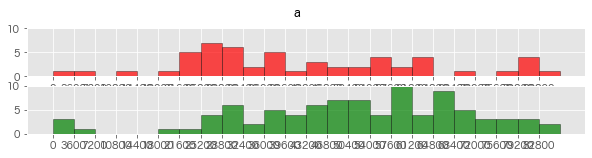

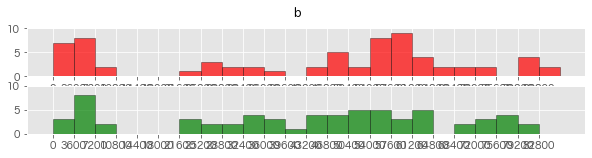

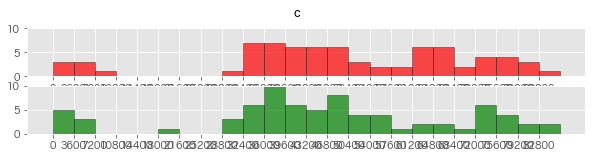

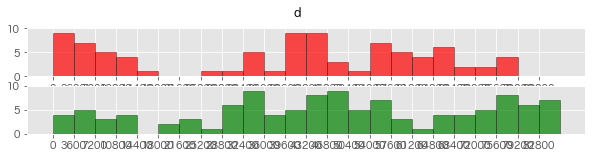

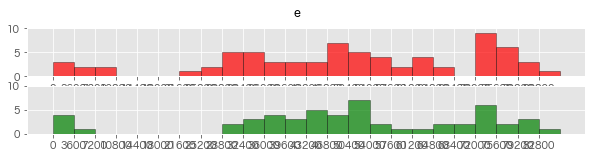

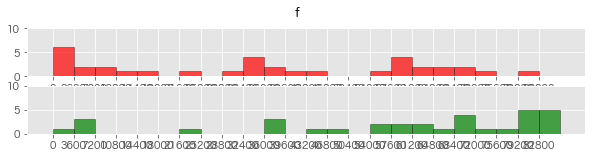

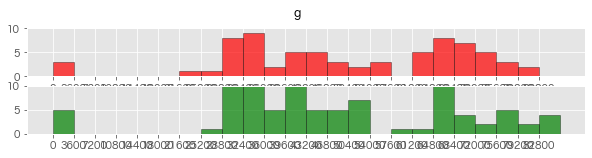

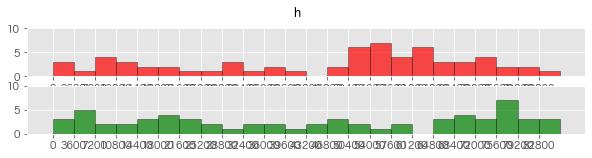

In [49]:
target = ["time_to_num", "battery"]
cover_name = ["a", "b", "c", "d", "e", "f", "g", "h"]

for i in range(len(users)):
    user = users[i]
    x_range = np.arange(0, 86400, 3600)
    color = ["red", "green", "blue", "yellow"]
    labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
    fig = plt.figure(figsize=(10, 3))

    first = 1
    last = 31

    ax1 = fig.add_subplot(311, xticks=x_range, ylim=(0, 10))
    ax2 = fig.add_subplot(312, xticks=x_range, ylim=(0, 10))

    ax1.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ][target[0]],
        bins=24,
        range=(0, 86400),
        ec="black",
        color=color[0],
        alpha=0.7,
    )

    ax2.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2022, 1, first))
            & (df["date"] < dt.datetime(2022, 1, last))
        ][target[0]],
        bins=24,
        range=(0, 86400),
        ec="black",
        color=color[1],
        alpha=0.7,
    )

    fig.suptitle(cover_name[i])
    # fig.savefig("bs_2_results/2months_{}_simple_compare_time_to_num.jpg".format(user))
    fig.show()

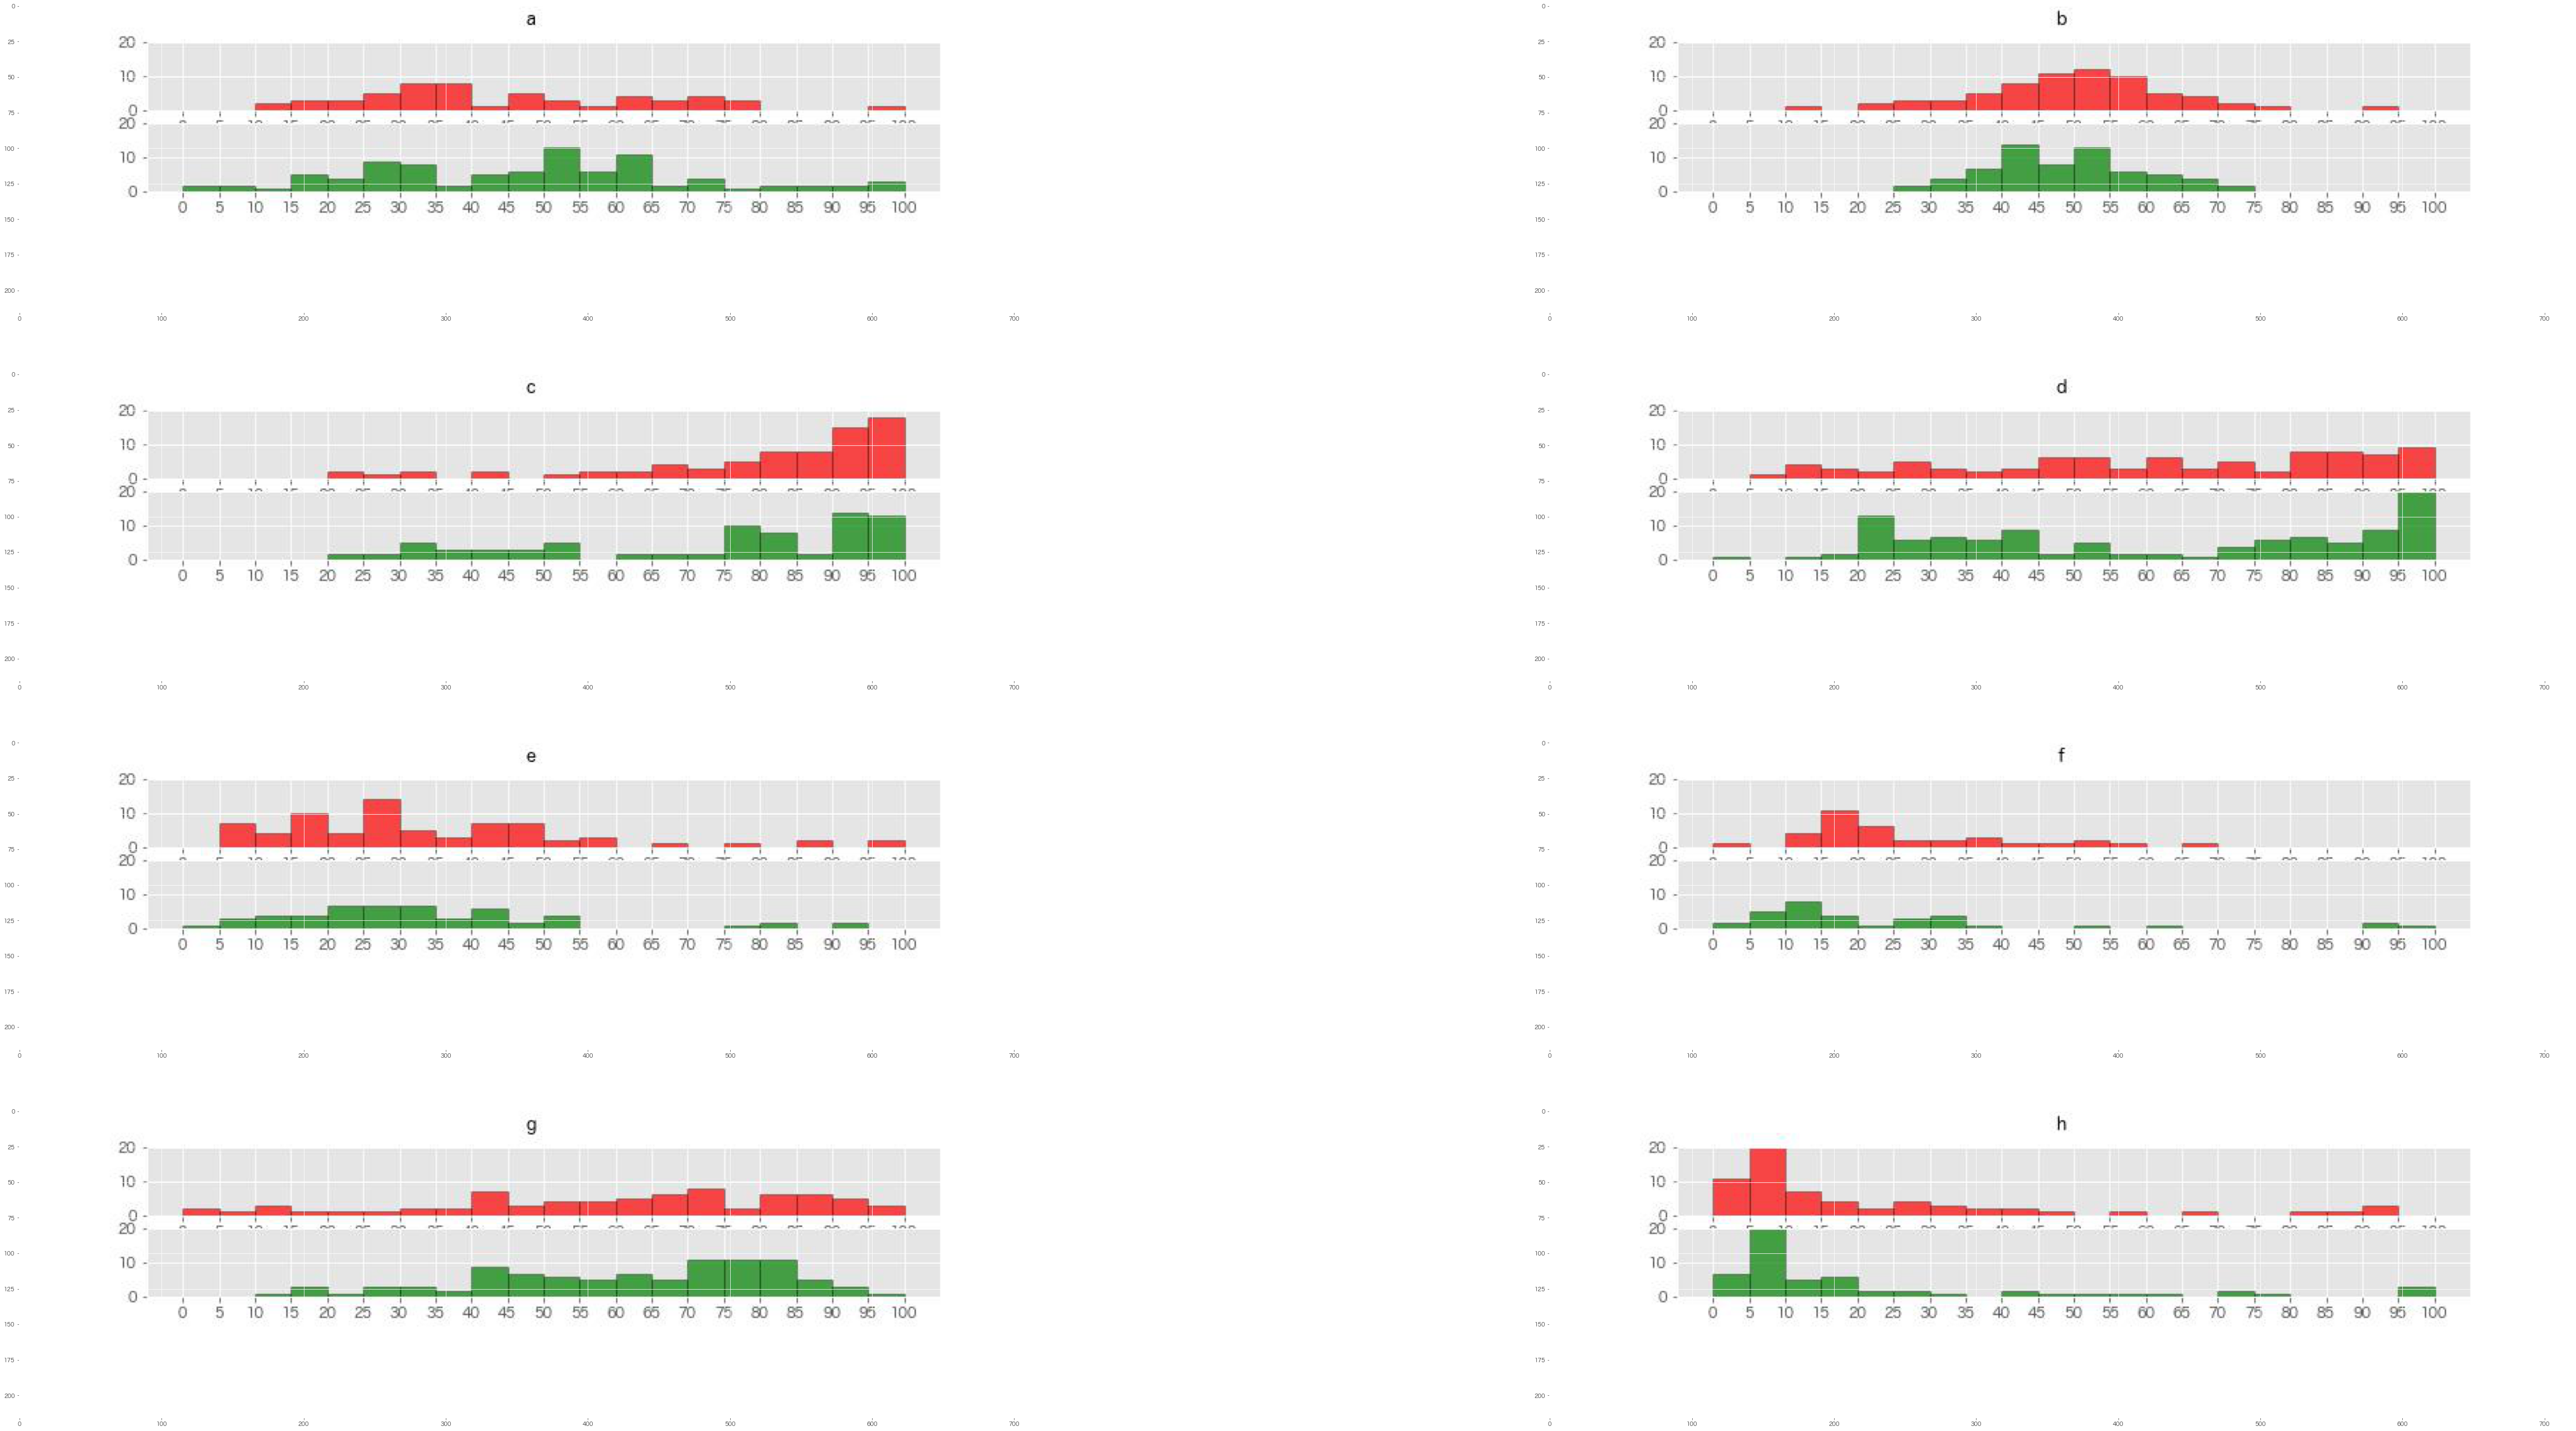

In [48]:
fig = plt.figure(figsize=(90, 95))
for h in range(len(users)):
    plt.subplot(8, 2, h + 1)
    user = users[h]
    img = plt.imread("./bs_2_results/2months_{}_simple_compare_BL.jpg".format(user))
    plt.imshow(img)

/var/folders/vq/5w5tvr9d2ns_2m_ynwknf3yc0000gn/T/ipykernel_19133/3533656964.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


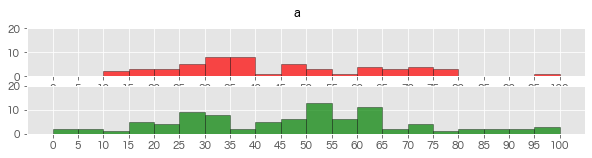

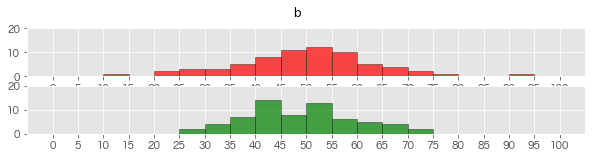

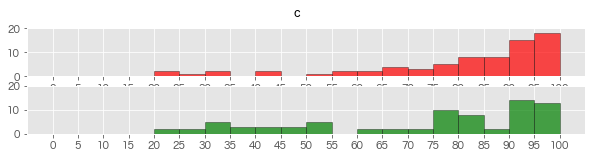

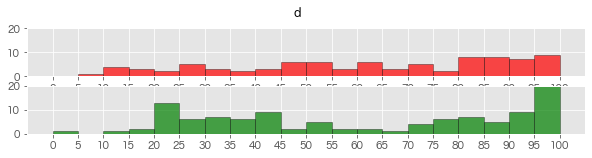

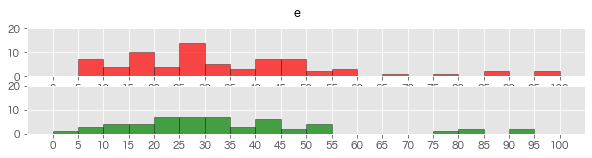

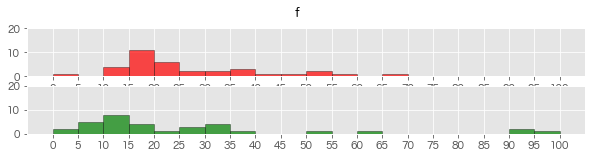

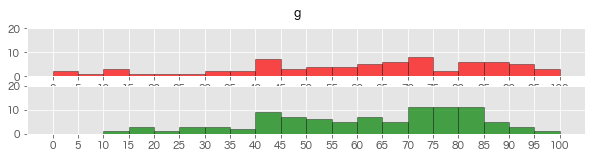

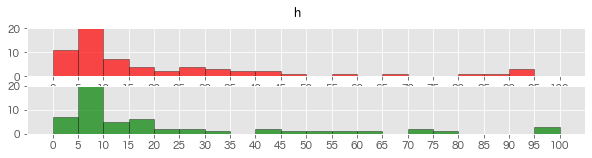

In [51]:
target = ["time_to_num", "battery"]
cover_name = ["a", "b", "c", "d", "e", "f", "g", "h"]


for i in range(len(users)):
    user = users[i]
    x_range = np.arange(0, 105, 5)
    color = ["red", "green", "blue", "yellow"]
    labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
    fig = plt.figure(figsize=(10, 3))

    first = 1
    last = 31

    ax1 = fig.add_subplot(311, xticks=x_range, ylim=(0, 20))
    ax2 = fig.add_subplot(312, xticks=x_range, ylim=(0, 20))

    ax1.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ][target[1]],
        bins=20,
        range=(0, 100),
        ec="black",
        color=color[0],
        alpha=0.7,
    )

    ax2.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2022, 1, first))
            & (df["date"] < dt.datetime(2022, 1, last))
        ][target[1]],
        bins=20,
        range=(0, 100),
        ec="black",
        color=color[1],
        alpha=0.7,
    )

    fig.suptitle(cover_name[i])
    # fig.savefig("bs_2_results/2months_{}_simple_compare_BL.jpg".format(user))
    fig.show()

/var/folders/vq/5w5tvr9d2ns_2m_ynwknf3yc0000gn/T/ipykernel_19133/2125282441.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


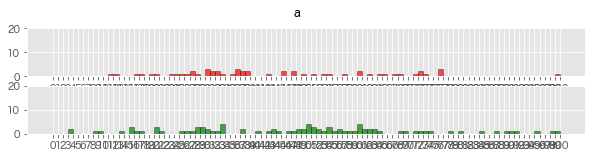

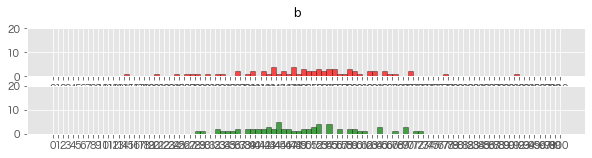

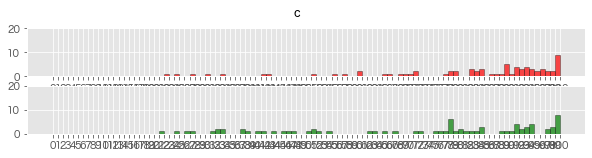

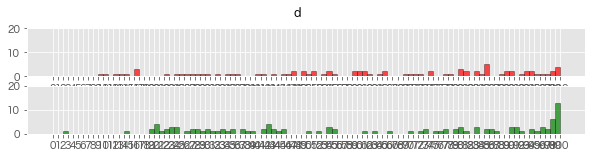

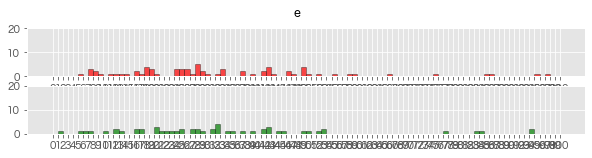

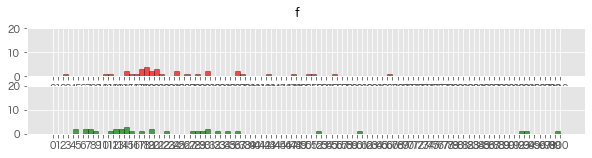

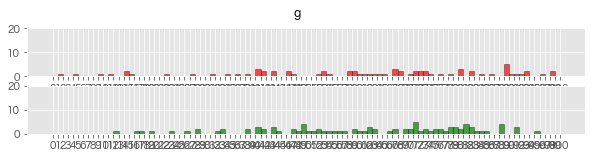

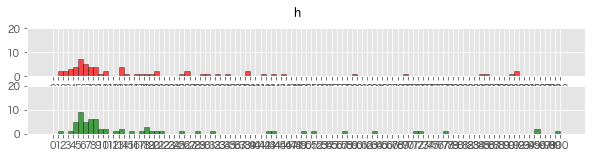

In [52]:
target = ["time_to_num", "battery"]
cover_name = ["a", "b", "c", "d", "e", "f", "g", "h"]


for i in range(len(users)):
    user = users[i]
    x_range = np.arange(0, 101, 1)
    color = ["red", "green", "blue", "yellow"]
    labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
    fig = plt.figure(figsize=(10, 3))

    first = 1
    last = 31

    ax1 = fig.add_subplot(311, xticks=x_range, ylim=(0, 20))
    ax2 = fig.add_subplot(312, xticks=x_range, ylim=(0, 20))

    ax1.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ][target[1]],
        bins=100,
        range=(0, 100),
        ec="black",
        color=color[0],
        alpha=0.7,
    )

    ax2.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2022, 1, first))
            & (df["date"] < dt.datetime(2022, 1, last))
        ][target[1]],
        bins=100,
        range=(0, 100),
        ec="black",
        color=color[1],
        alpha=0.7,
    )

    fig.suptitle(cover_name[i])
    # fig.savefig("bs_2_results/2months_{}_simple_compare_BL.jpg".format(user))
    fig.show()